### Given two list of x and y coordinates, and a list of errors on y, find the straight line that minimizes the sum of distances between the line and the (x,y) points.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
xdata = np.array([26.2,27.2,28.2,29.2,30.2])/(10**2)
ydata = np.array([2.026,2.015,2.005,1.995,1.986])
yerr = np.array([0.001]*5)
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)): print ("dimensioni vettori disuguali")
npoint = len(xdata)
npoint

5

In [3]:
xdata1 = np.array([26.2,27.2,28.2,29.2,30.2])/(10**2)
ydata1 = np.array([2.008,2.005,2.003,2.001,1.999])
yerr1 = np.array([0.001]*5)
if (len(xdata1)!=len(ydata1)): print ("dimensioni vettori disuguali")
if (len(yerr1)!=len(ydata1)): print ("dimensioni vettori disuguali")
npoint = len(xdata1)
npoint

5

Determiniamo i parametri $a$ and $b$ della retta di best fit $y = b x + a$ che minimizza:
$ \chi^2 = \sum_i \frac{(y_i - b x_i - a)^2}{\sigma_i^2}$
    
$a$ e $b$ sono soluzioni del sistema lineare:
$\begin{bmatrix}
\sum_i \frac{1}{\sigma_i^2} & \sum_i \frac{x_i}{\sigma_i^2}\\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2}
\end{bmatrix}$
$\begin{bmatrix} a\\b \end{bmatrix}$ = 
$\begin{bmatrix} \sum_i \frac{y_i}{\sigma_i^2} \\ \sum_i \frac{x_i y_i}{\sigma_i^2}\end{bmatrix}$

In forma matriciale : DA = B quindi A = D^(-1)B

In [4]:
yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdata/yerrSq).sum()
sum_xSq_over_yerrSq = (xdata*xdata/yerrSq).sum()
sum_y_over_yerrSq = (ydata/yerrSq).sum()
sum_xy_over_yerrSq = (xdata*ydata/yerrSq).sum()

In [5]:
yerrSq1 = yerr1*yerr1
sum_one_over_yerrSq1 = (1./yerrSq1).sum()
sum_x_over_yerrSq1 = (xdata1/yerrSq1).sum()
sum_xSq_over_yerrSq1 = (xdata1*xdata1/yerrSq1).sum()
sum_y_over_yerrSq1 = (ydata1/yerrSq1).sum()
sum_xy_over_yerrSq1 = (xdata1*ydata1/yerrSq1).sum()

Calcolo Coefficiente correlazione lineare

In [6]:
sum_x = (xdata).sum()
sum_y = (ydata).sum()
xmean=sum_x/npoint
ymean=sum_y/npoint
ameanx=xdata-xmean
varx = (ameanx*ameanx).sum()
devstx = np.sqrt(varx)
ameany = ydata-ymean
vary = (ameany*ameany).sum()
devsty = np.sqrt(vary)
covxy = (ameanx*ameany).sum()
corrcoeff=covxy/(devstx*devsty)
print ("coefficiente correlazione = ",corrcoeff)
print ("Covarianza = ",covxy)

coefficiente correlazione =  -0.9994005394605666
Covarianza =  -0.0009999999999999957


In [7]:
sum_x1 = (xdata1).sum()
sum_y1 = (ydata1).sum()
xmean1=sum_x1/npoint
ymean1=sum_y1/npoint
ameanx1=xdata1-xmean1
varx1 = (ameanx1*ameanx1).sum()
devstx1 = np.sqrt(varx1)
ameany1 = ydata1-ymean1
vary1 = (ameany1*ameany1).sum()
devsty1 = np.sqrt(vary1)
covxy1 = (ameanx1*ameany1).sum()
corrcoeff1=covxy1/(devstx1*devsty1)
print ("coefficiente correlazione = ",corrcoeff1)
print ("Covarianza = ",covxy1)

coefficiente correlazione =  -0.9958932064677026
Covarianza =  -0.00021999999999999779


In [8]:
matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq],[sum_x_over_yerrSq,sum_xSq_over_yerrSq]])
matD

array([[5000000., 1410000.],
       [1410000.,  398620.]])

In [9]:
matD1 = np.array([[sum_one_over_yerrSq1,sum_x_over_yerrSq1],[sum_x_over_yerrSq1,sum_xSq_over_yerrSq1]])
matD1

array([[5000000., 1410000.],
       [1410000.,  398620.]])

In [10]:
matD_inv = np.linalg.inv(matD)
matD_inv

array([[ 7.9724e-05, -2.8200e-04],
       [-2.8200e-04,  1.0000e-03]])

In [11]:
matD_inv1 = np.linalg.inv(matD1)
matD_inv1

array([[ 7.9724e-05, -2.8200e-04],
       [-2.8200e-04,  1.0000e-03]])

Check D^(-1)D = I

In [12]:
np.dot(matD,matD_inv)

array([[1.00000000e+00, 9.32136313e-14],
       [1.58237139e-14, 1.00000000e+00]])

In [13]:
np.dot(matD1,matD_inv1)

array([[1.00000000e+00, 9.32136313e-14],
       [1.58237139e-14, 1.00000000e+00]])

In [14]:
matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq])
matB

array([10027000.,  2826614.])

In [15]:
matB1 = np.array([sum_y_over_yerrSq1,sum_xy_over_yerrSq1])
matB1

array([10016000.,  2824292.])

In [16]:
np.dot(matD_inv,matB)

array([ 2.2874, -1.    ])

In [17]:
np.dot(matD_inv1,matB1)

array([ 2.06524, -0.22   ])

Calcolo parametri fit

In [18]:
a, b = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1]
print (" intercetta a (s)= ", a)
print (" coeff.angolare b (m/s)= ", b)

 intercetta a (s)=  2.287400000000014
 coeff.angolare b (m/s)=  -1.0000000000000384


In [19]:
a1, b1 = np.dot(matD_inv1,matB1)[0],np.dot(matD_inv1,matB1)[1]
print (" intercetta a1 (s)= ", a1)
print (" coeff.angolare b1 (m/s)= ", b1)

 intercetta a1 (s)=  2.065240000000078
 coeff.angolare b1 (m/s)=  -0.21999999999988104


Calcolo errori sui parametri

In [20]:
siga, sigb = np.sqrt(matD_inv[0,0]), np.sqrt(matD_inv[1,1])
print (" errore su intercetta siga (s)= ",siga)
print (" errore su coeff.angolare sigb (m/s)= ",sigb)

 errore su intercetta siga (s)=  0.008928829710549717
 errore su coeff.angolare sigb (m/s)=  0.03162277660168287


In [21]:
siga1, sigb1 = np.sqrt(matD_inv1[0,0]), np.sqrt(matD_inv1[1,1])
print (" errore su intercetta siga1 (s)= ",siga1)
print (" errore su coeff.angolare sigb1 (m/s)= ",sigb1)

 errore su intercetta siga1 (s)=  0.008928829710549717
 errore su coeff.angolare sigb1 (m/s)=  0.03162277660168287


Plot

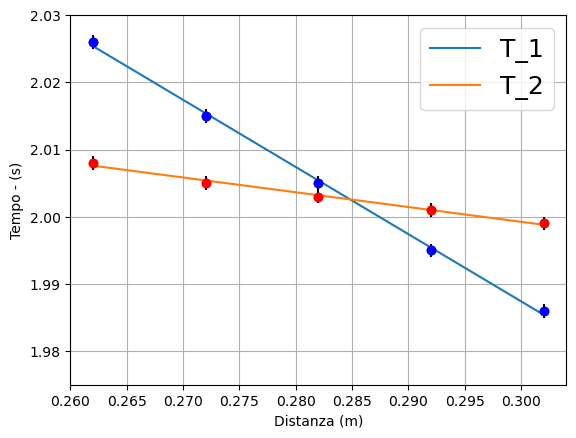

In [30]:
fig, ax = plt.subplots()
ax.set_ylim(1.975,2.030)
ax.set_xlim(0.26, 0.304)
ax.set_xlabel('Distanza (m)')
ax.set_ylabel('Tempo - (s)')
ax.grid()

# Plot delle linee di fit
plt.plot(xdata, b * xdata + a, label='T_1')
plt.plot(xdata1, b1 * xdata1 + a1, label='T_2')

# Plot dei dati
plt.plot(xdata, ydata, 'bo')
plt.plot(xdata1, ydata1, 'ro')

# Error bars
plt.errorbar(xdata, ydata, yerr=yerr, fmt='bo', ecolor='black')
plt.errorbar(xdata1, ydata1, yerr=yerr1, fmt='ro', ecolor='black')
ax.legend(fontsize="18", loc ="upper right")
plt.savefig("Int_Sx.png")

Calcolo X^2 e errore standard della stima

In [23]:
scarto1 = (ydata-a-b*xdata)/yerr
scarto2 = (ydata-a-b*xdata)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-2)).sum()
errst = np.sqrt(errstSq)
print (" Chi^2 = ",chi2)
print (" errore standard della stima (u.m.) = ",errst)

 Chi^2 =  1.1999999999996689
 errore standard della stima (u.m.) =  0.0006324555320335886
